In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#引入数据集
import sklearn.datasets as datasets
boston = datasets.load_boston()

In [3]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
xtrain = boston_df[['RM','LSTAT','PTRATIO']]
ytrain = boston_df[['PRICE']]
train_X = xtrain.loc[:400]
test_X = xtrain.loc[400:]
train_y = ytrain.loc[:400]
test_y = ytrain.loc[400:]
# 查看数据是否存在空值，从结果来看数据不存在空值。
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [4]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

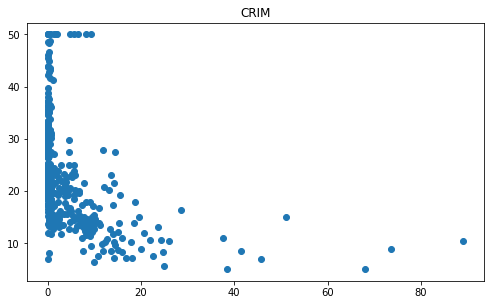

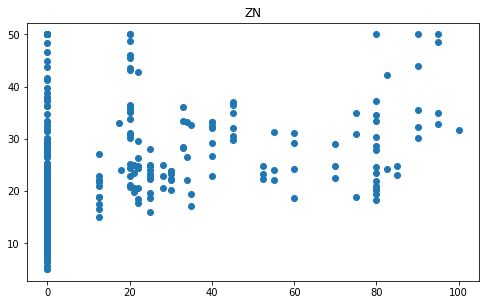

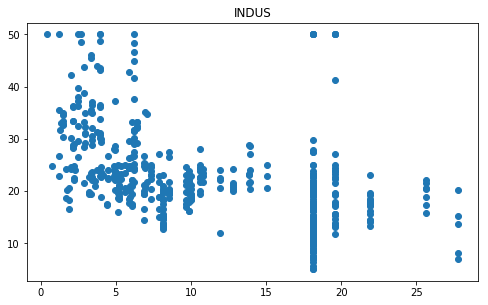

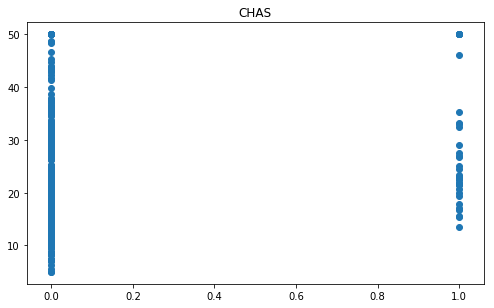

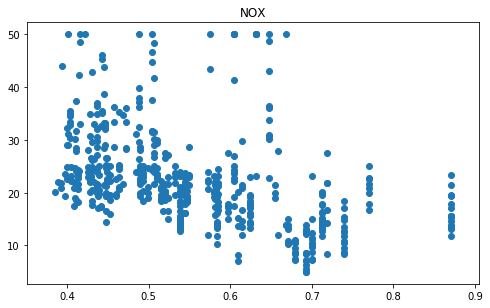

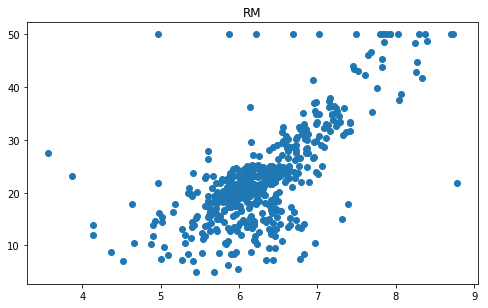

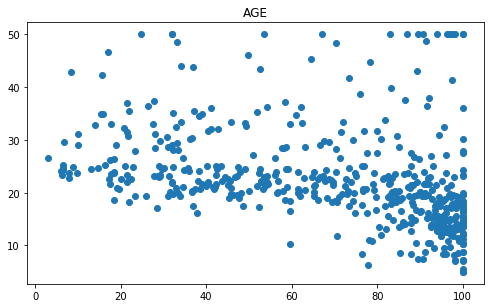

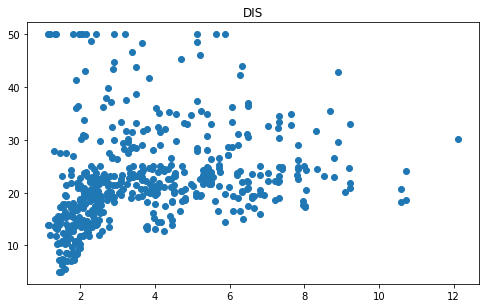

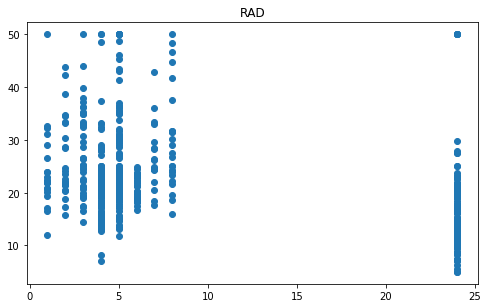

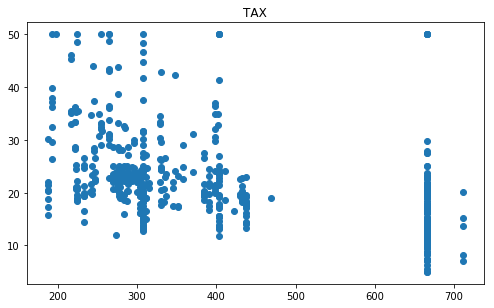

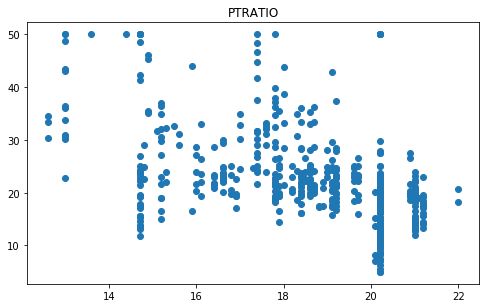

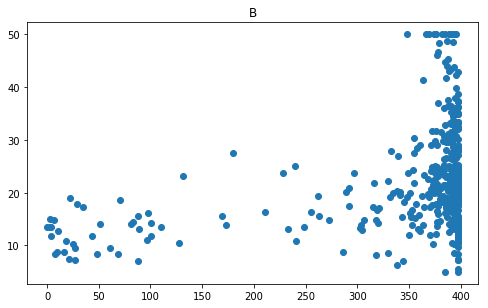

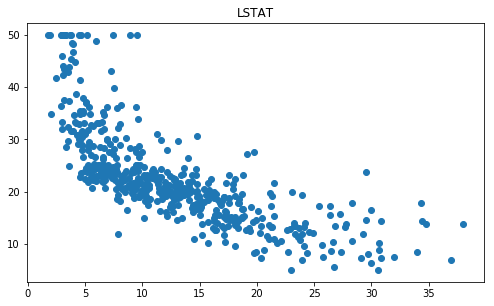

In [5]:
#可视化：特征和标签的相关性

for i in range(13):
    plt.figure(figsize=(20,20))
    plt.subplot(5,3,i+1)
    plt.scatter( boston_df[boston_df.columns[i]],boston_df['PRICE'])
    plt.title(boston_df.columns[i])
    plt.tight_layout()
    plt.show()

In [6]:
# 相关系数
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [7]:
# 查看数据大小
boston_df.shape #(506,14)
# 显示数据前5行
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
#有截距的情况
new_columns = boston_df.columns.insert(0, "Intercept")
# 重新安排列的顺序，设置1填充
boston_df = boston_df.reindex(columns=new_columns, fill_value=1)

boston_df.dropna(axis=0,inplace=True)
#数据分割,将数据的后百分之20作为测试集
df_train = boston_df.values[:-(boston_df.shape[0]//5),:]
df_test = boston_df.values[-(boston_df.shape[0]//5):,:]
#将训练集与测试集分为特征X,预测Y
X_train = df_train[:,:-1]
y_train = df_train[:,-1]
X_test = df_test[:,:-1]
y_test =  df_test[:,-1]

In [9]:
y_test

array([  5. ,  11.9,  27.9,  17.2,  27.5,  15. ,  17.2,  17.9,  16.3,
         7. ,   7.2,   7.5,  10.4,   8.8,   8.4,  16.7,  14.2,  20.8,
        13.4,  11.7,   8.3,  10.2,  10.9,  11. ,   9.5,  14.5,  14.1,
        16.1,  14.3,  11.7,  13.4,   9.6,   8.7,   8.4,  12.8,  10.5,
        17.1,  18.4,  15.4,  10.8,  11.8,  14.9,  12.6,  14.1,  13. ,
        13.4,  15.2,  16.1,  17.8,  14.9,  14.1,  12.7,  13.5,  14.9,
        20. ,  16.4,  17.7,  19.5,  20.2,  21.4,  19.9,  19. ,  19.1,
        19.1,  20.1,  19.9,  19.6,  23.2,  29.8,  13.8,  13.3,  16.7,
        12. ,  14.6,  21.4,  23. ,  23.7,  25. ,  21.8,  20.6,  21.2,
        19.1,  20.6,  15.2,   7. ,   8.1,  13.6,  20.1,  21.8,  24.5,
        23.1,  19.7,  18.3,  21.2,  17.5,  16.8,  22.4,  20.6,  23.9,
        22. ,  11.9])

In [10]:
from linearRegression import *
lr = linearRegression()
lr.fit(X_train,y_train)
result = lr.predict(X_test)
result

array([  4.24625596,   6.74942796,  21.35665166,  15.43872083,
        23.75473818,  16.9916483 ,  22.37053454,   4.77337382,
        12.51793438,  -4.07621534,  14.7535076 ,  19.56247114,
         9.12166371,   6.23506274,  20.54723556,  22.21280099,
        20.67887201,  20.34325654,  19.12994293,  19.84124888,
        15.03499028,  21.256405  ,  17.48688033,  19.35424853,
        18.58216317,  23.25315636,  24.14705041,  26.74680213,
        22.69123679,  20.68130375,  18.61847269,  20.2935557 ,
        14.382611  ,   9.57761023,  14.17151575,  12.96999777,
        19.31147438,  20.83289033,  20.1150022 ,  14.35078399,
        19.79751319,  20.72752146,  19.99144123,  19.20298221,
        20.33217367,  23.53184691,  22.37784236,  20.8874362 ,
        25.702576  ,  21.97826356,  22.20880187,  19.04695712,
        19.00621027,  20.62633585,  20.39237386,  23.297141  ,
        22.64657505,  21.89620039,  24.89569012,  22.08358699,
        20.32460847,  20.55026623,  19.29381263,  17.88

In [11]:
lr.w

matrix([[  3.01834801e+01],
        [ -1.94651664e-01],
        [  4.40677436e-02],
        [  5.21447706e-02],
        [  1.88823450e+00],
        [ -1.49475195e+01],
        [  4.76119492e+00],
        [  2.62339333e-03],
        [ -1.30091291e+00],
        [  4.60230476e-01],
        [ -1.55731325e-02],
        [ -8.11248033e-01],
        [ -2.18154708e-03],
        [ -5.31513940e-01]])

In [12]:
lt = linearRegression()
lt.fit(train_X,train_y)
result = lt.predict(test_X)
result

array([ 13.77519486,  18.94070518,  19.33006465,  12.91877868,
        10.62229356,  13.57288666,   3.66293351,  18.01099638,
        11.60844308,  22.39628396,  19.86535353,  20.51426257,
         1.76147245,  11.55456184,  -0.10759939,  15.56315569,
        19.23423894,   9.5251721 ,  16.36973733,  20.87979191,
        21.7687504 ,  18.90590911,  17.37162309,  16.08223436,
        15.46288539,  14.27840953,  17.84425906,  20.67654993,
        17.45121324,  17.47216012,  20.18535395,  22.31715656,
        23.21049966,  21.38328745,  20.42017911,  19.40968308,
        20.71265426,  14.96098484,  10.16541968,  13.2648625 ,
        14.81837266,  19.70027653,  19.84681058,  20.50194303,
        14.28503326,  18.01581546,  20.07329512,  20.11658784,
        18.93523075,  19.86472938,  22.80568774,  22.08139762,
        20.03108929,  27.1853702 ,  22.0983373 ,  21.08020134,
        17.21837169,  17.90301009,  20.52708143,  19.83171554,
        22.96457253,  21.71542553,  21.64195981,  24.55

In [13]:
theta = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
rest = lr.gradient
res = lr.gradient_descent(X_train,theta,y_train,0.001)
X_test = np.asmatrix(X_test.copy())
np.asarray(result).ravel()

[  9.77550000e+00   1.21450317e+01   1.68607800e+02   8.35066350e+01
   9.95400000e-01   5.06258361e+00   6.39439668e+01   5.98280020e+02
   4.18244470e+01   6.09493000e+01   3.28634690e+03   1.72558170e+02
   3.73492202e+03   9.30913840e+01]


NameError: name 'm' is not defined